In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.patches as patches


import matplotlib as mpl
import seaborn as sns
import datetime

import tqdm
import re
from string import punctuation
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,BayesianRidge,ElasticNet,Ridge,SGDRegressor

from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.model_selection import KFold,GridSearchCV,learning_curve,RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,TimeSeriesSplit
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR




In [16]:


from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, ElasticNet, Ridge, SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR



In [45]:


def generate_pipeline(model,cat_features,num_features):
    # We create the preprocessing pipelines for both numeric and categorical data.
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_features = cat_features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
       
        
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_features),
            ('cat', categorical_transformer, categorical_features)])
    
    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier',model)])
    return clf 



In [1]:
import numpy as np 
import pandas as pd

In [94]:
train= pd.read_csv('./data/diabetes_train_analysis.csv')
test= pd.read_csv('./data/diabetes_test_analysis.csv')
train_info= pd.read_csv('./data/diabetes_train_info.csv')
test_info= pd.read_csv('./data/diabetes_test_info.csv')

In [95]:
train

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,56041,low,low,0,0,1,120/80,0
1,83393,low,low,0,0,1,120/80,0
2,29416,high,high,1,0,0,160/110,1
3,55191,low,low,0,0,1,100/70,0
4,42861,low,low,0,0,1,130/80,0
...,...,...,...,...,...,...,...,...
59995,47616,medium,low,0,0,1,130/90,0
59996,18660,low,medium,1,0,1,120/80,1
59997,19432,low,low,0,0,1,100/70,0
59998,44640,medium,medium,1,1,1,130/80,1


In [96]:
test

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,93552,low,low,0,0,1,110/70,0
1,90949,low,low,0,0,1,110/80,0
2,94702,high,low,0,0,1,120/80,0
3,95862,low,low,1,0,1,140/80,0
4,91802,low,low,0,0,1,120/80,0
...,...,...,...,...,...,...,...,...
9995,88525,medium,low,0,0,1,120/80,0
9996,86390,low,low,0,0,1,160/60,0
9997,96318,low,low,0,0,1,120/80,0
9998,86367,low,low,0,0,1,120/80,0


In [97]:
test_info

,id,age,height,weight,gender
0,85656,19149,165,62.0,male
1,85658,14453,159,67.0,m
2,85659,15877,168,59.0,m
3,85660,21228,167,70.0,f
4,85661,54,163,82.0,f
...,...,...,...,...,...
9995,99993,19240,168,NaN,f
9996,99995,22601,158,126.0,male
9997,99996,19066,183,105.0,female
9998,99998,22431,163,72.0,male


In [110]:
train_= train.merge(train_info, on='id')
train_.drop('id', axis=1, inplace=True)
test_= test.merge(test_info, on='id')
test_.drop('id', axis=1, inplace=True)

train_

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,low,low,0,0,1,120/80,0,21443,169,73.0,f
1,low,low,0,0,1,120/80,0,18374,167,58.0,m
2,high,high,1,0,0,160/110,1,17592,179,118.0,female
3,low,low,0,0,1,100/70,0,14687,155,86.0,m
4,low,low,0,0,1,130/80,0,64,165,65.0,male
...,...,...,...,...,...,...,...,...,...,...,...
59995,medium,low,0,0,1,130/90,0,19180,158,85.0,m
59996,low,medium,1,0,1,120/80,1,45,165,85.0,f
59997,low,low,0,0,1,100/70,0,14672,156,62.0,male
59998,medium,medium,1,1,1,130/80,1,23314,169,74.0,female


In [99]:
test_

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,low,low,0,0,1,110/70,0,59,169,72.0,male
1,low,low,0,0,1,110/80,0,19147,167,69.0,male
2,high,low,0,0,1,120/80,0,44,166,72.0,m
3,low,low,1,0,1,140/80,0,20340,163,83.0,f
4,low,low,0,0,1,120/80,0,15883,175,84.0,f
...,...,...,...,...,...,...,...,...,...,...,...
9995,medium,low,0,0,1,120/80,0,50,167,74.0,m
9996,low,low,0,0,1,160/60,0,46,162,64.0,male
9997,low,low,0,0,1,120/80,0,18227,165,74.0,f
9998,low,low,0,0,1,120/80,0,14563,173,77.0,female


In [100]:
train_.isnull().sum()

cholesterol       0
gluc              0
smoke             0
alco              0
active            0
pressure          0
diabetes          0
age               0
height            0
weight         1982
gender            0
dtype: int64

In [101]:
for col in ['cholesterol','gluc','smoke','alco', 'active','pressure','gender']:
    print(train_[col].value_counts())

low       44914
medium     8218
high       6868
Name: cholesterol, dtype: int64
low       50968
high       4582
medium     4450
Name: gluc, dtype: int64
0    54736
1     5264
Name: smoke, dtype: int64
0    56810
1     3190
Name: alco, dtype: int64
1    48252
0    11748
Name: active, dtype: int64
120/80     20159
140/90      4928
110/70      4738
130/80      3838
130/90      2804
           ...  
166/126        1
160/63         1
129/80         1
139/91         1
153/70         1
Name: pressure, Length: 1130, dtype: int64
m         27517
f         14623
male      11608
female     6252
Name: gender, dtype: int64


In [111]:
def prepro( df):
    df['pressure_1']=0
    df.pressure_1=df.pressure.apply(lambda x: int(x.split('/')[0]))
    df['pressure_2']=0
    df.pressure_1=df.pressure.apply(lambda x: int(x.split('/')[1]))
    df.gender= df.gender.map({'female':'f', 'male':'m', 'm':'m','f':'f'})
    df.drop('pressure',axis=1, inplace=True)
    df.age=df.age.astype(int)
    df.age=df.age.apply(lambda x : x if  x <150  else x//365)
    
    return df
train_=prepro(train_)

In [112]:
train_

,cholesterol,gluc,smoke,alco,active,diabetes,age,height,weight,gender,pressure_1,pressure_2
0,low,low,0,0,1,0,58,169,73.0,f,80,0
1,low,low,0,0,1,0,50,167,58.0,m,80,0
2,high,high,1,0,0,1,48,179,118.0,f,110,0
3,low,low,0,0,1,0,40,155,86.0,m,70,0
4,low,low,0,0,1,0,64,165,65.0,m,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,medium,low,0,0,1,0,52,158,85.0,m,90,0
59996,low,medium,1,0,1,1,45,165,85.0,f,80,0
59997,low,low,0,0,1,0,40,156,62.0,m,70,0
59998,medium,medium,1,1,1,1,63,169,74.0,f,80,0


<AxesSubplot:ylabel='Frequency'>

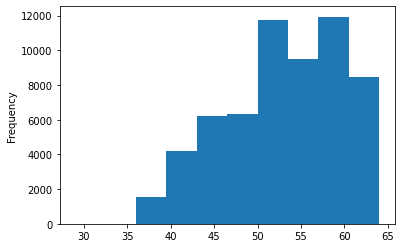

In [114]:
train_.age.plot(kind='hist')

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
numeric_features=[ 'age' ,'height','weight']
categoric_features=[col for col in train_.columns if col not in numeric_features and  col!='diabetes']
numeric_features, categoric_features

(['age', 'height', 'weight'],
 ['cholesterol',
  'gluc',
  'smoke',
  'alco',
  'active',
  'gender',
  'pressure_1',
  'pressure_2'])

In [117]:
train_[numeric_features]=train_[numeric_features].astype(float)

In [118]:
model=LogisticRegression()
clf=generate_pipeline(model, categoric_features,numeric_features)

In [119]:
X=train_.drop('diabetes', axis=1)
Y=train_.diabetes
clf.fit(X,Y)

/home/aleks/miniconda3/envs/ai37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ch

In [120]:
test_=prepro(test_)


In [121]:
test_[numeric_features]=test_[numeric_features].astype(float)

In [122]:
X_test.head()

,cholesterol,gluc,smoke,alco,active,age,height,weight,gender,pressure_1,pressure_2
0,low,low,0,0,1,59.0,169.0,72.0,m,70,0
1,low,low,0,0,1,19147.0,167.0,69.0,m,80,0
2,high,low,0,0,1,44.0,166.0,72.0,m,80,0
3,low,low,1,0,1,20340.0,163.0,83.0,f,80,0
4,low,low,0,0,1,15883.0,175.0,84.0,f,80,0


In [123]:
X_test=test_.drop('diabetes', axis=1)

pred=clf.predict(X_test)


In [124]:
from sklearn.metrics import  accuracy_score

In [125]:
accuracy_score(pred, test_.diabetes)

0.9948